# Concise Implementation of Multilayer Perceptron

:label:`sec_mlp_gluon`


Now that we learned how multilayer perceptrons (MLPs) work in theory, let's implement them. We begin, as always, by importing modules.

In [1]:
import d2l
from mxnet import gluon, init, npx
from mxnet.gluon import nn
npx.set_np()

## The Model

The only difference from our softmax regression implementation
is that we add two `Dense` (fully-connected) layers instead of one.
The first is our hidden layer, which has *256* hidden units
and uses the ReLU activation function.

In [2]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

Again, note that as always, Gluon automatically
infers the missing input dimensions to each layer.

Training the model follows the exact same steps as in our softmax regression implementation.

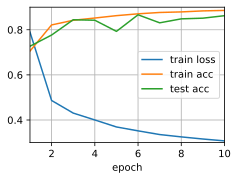

In [3]:
batch_size, num_epochs = 256, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Exercises

1. Try adding a few more hidden layers to see how the result changes.
1. Try out different activation functions. Which ones work best?
1. Try out different initializations of the weights.

## [Discussions](https://discuss.mxnet.io/t/2340)

![](../img/qr_mlp-gluon.svg)